In [56]:
#import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [57]:
#import dependencies
import numpy as np
import pandas as pd

In [58]:
#import dependencies
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [59]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [60]:
#Use SQLAlchemy create_engine to connect to your sqlite database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [61]:
#Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes 
#called Station and Measurement.
Base = automap_base()
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [62]:
# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [63]:
inspector = inspect(engine)

In [64]:
# We can view all of the classes that automap found
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [65]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [115]:
# Perform a query to retrieve the data and precipitation scores
#Select only the date and prcp values.
# Sort the dataframe by date
query = (session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >='2016-08-23').order_by(Measurement.date).all())

In [75]:
#Load the query results into a Pandas DataFrame and set the index to the date column.
Measurement_df = pd.DataFrame(query, columns=['date','precipatation']).fillna(0)
Measurement_df.set_index('date',inplace=True)
Measurement_df.head()

,precipatation
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.00
2016-08-23,0.02


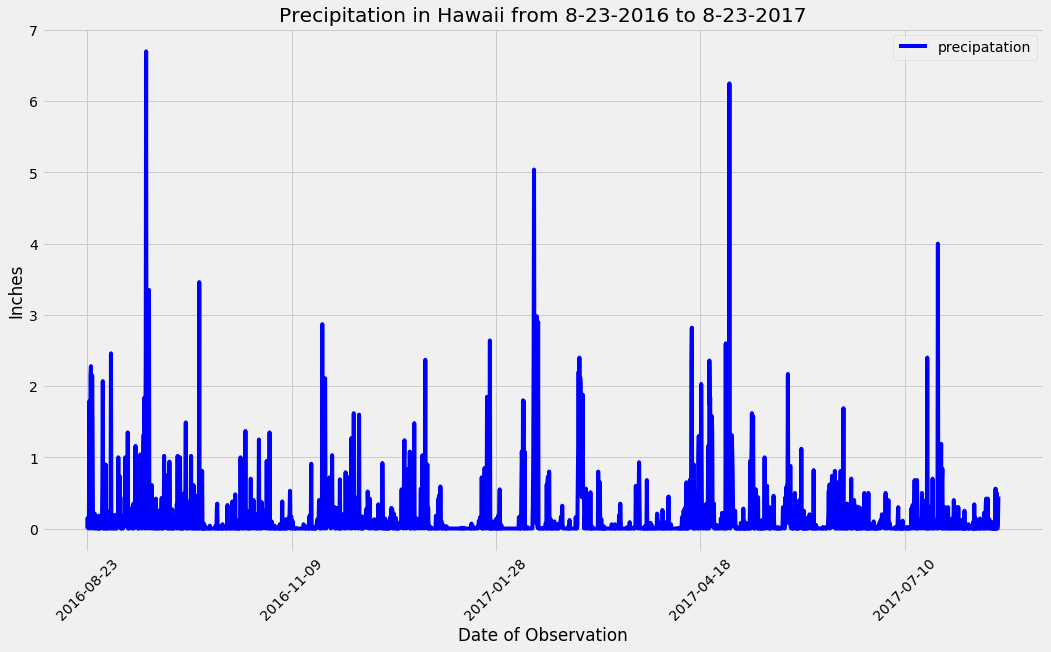

In [117]:
#Plot the results using the DataFrame plot method.
prcp_chart = Measurement_df.plot(figsize = (16, 9), sort_columns=True, rot=45, use_index=True, legend=True, grid=True, color='b')
plt.ylabel('Inches')
plt.xlabel('Date of Observation')
plt.title("Precipitation in Hawaii from 8-23-2016 to 8-23-2017")
plt.savefig('Final Images/Precipitation In Hawaii.png')
plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Measurement_df.describe() 

,precipatation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
#STATION ANALYSIS

In [19]:
# Design a query to show how many stations are available in this dataset?
results = len(session.query(Measurement.station).group_by(Measurement.station).all())
results

9

In [77]:
#Design a query to find the most active stations.
# What are the most active stations? (i.e. what stations have the most rows)?
#List the stations and observation counts in descending order.
active_stations = (session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)
                   .order_by(func.count(Measurement.station)).all())
active_stations

[('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00511918', 1979),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00519523', 2669),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519281', 2772)]

In [82]:
#Design a query to retrieve the last 12 months of temperature observation data (TOBS)
#Filter by the station with the highest number of observations.
year_temp = (session.query(Measurement.station, Measurement.tobs, Measurement.date)
             .filter(Measurement.station == 'USC00519281').filter(Measurement.date >= '2016-08-03')
             .order_by(Measurement.tobs)).all()

yearly_df = pd.DataFrame(year_temp, columns=['station','tobs','date']).fillna(0)
yearly_df.set_index('station',inplace=True)
yearly_df

,tobs,date
station,,
USC00519281,59.0,2017-02-02
USC00519281,59.0,2017-02-08
USC00519281,59.0,2017-02-09
USC00519281,60.0,2017-02-03
USC00519281,60.0,2017-04-30
...,...,...
USC00519281,82.0,2016-08-17
USC00519281,82.0,2017-07-23
USC00519281,82.0,2017-07-29


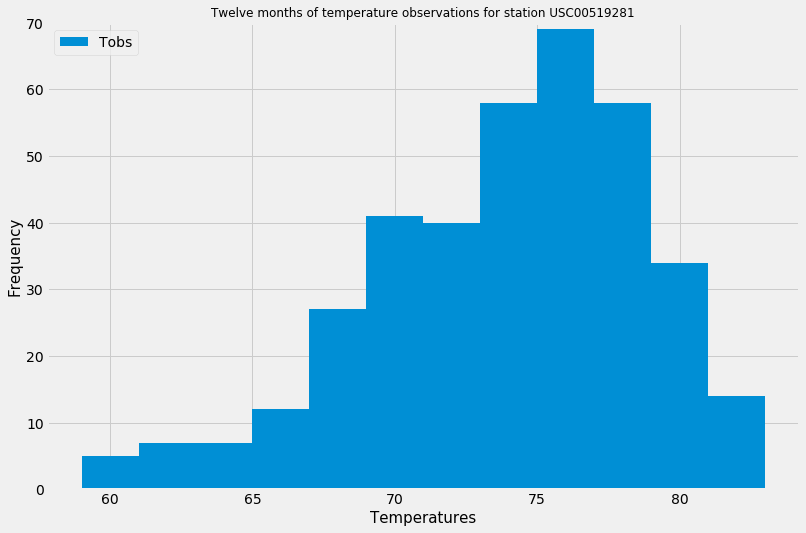

In [118]:
# Create the Histogram Chart
#Plot the results as a histogram with bins=12
fig=plt.figure(figsize=(12,8))
plt.hist(yearly_df['tobs'],bins = 12)
plt.xlabel("Temperatures", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.ylim(0, 70)
plt.legend(['Tobs'], loc='upper left')
plt.title("Twelve months of temperature observations for station USC00519281", fontsize=12)
plt.savefig('Final Images/12 Months of Temp Obs.png')
plt.show()

## Bonus Challenge Assignment

In [ ]:
#Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, 
#for example, June and December?

In [92]:
#You may either use SQLAlchemy or pandas's read_csv() to perform this portion.
measurement_df = pd.read_csv("Resources/hawaii_measurements.csv")
measurement_df.fillna(method='ffill', inplace=True)
measurement_df

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,0.00,73
...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71
19546,USC00516128,2017-08-20,0.09,78
19547,USC00516128,2017-08-21,0.56,76
19548,USC00516128,2017-08-22,0.50,76


In [93]:
station_df = pd.read_csv("Resources/hawaii_stations.csv")
station_df.fillna(method='ffill', inplace=True)
station_df

,station,name,latitude,longitude,elevation
0,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [95]:
#Identify the average temperature in June at all stations across all available years in the dataset. 
measurement_df['month'] = pd.DatetimeIndex(measurement_df['date']).month
all_june_temps=measurement_df[measurement_df['month']==6]
all_june_temps['tobs'].mean()

74.94411764705882

In [96]:
#Do the same for December temperature.
all_dec_temps=measurement_df[measurement_df['month']==12]
all_dec_temps['tobs'].mean()

71.04152933421226

In [97]:
#Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
jun_temps = all_june_temps['tobs']
dec_temps = all_dec_temps['tobs']

In [99]:
import scipy
from scipy import stats
stats.ttest_ind(jun_temps, dec_temps)

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

In [98]:
#Will you use a paired t-test, or an unpaired t-test? Why?

#A paired t-test is designed to compare the means of the same group or item under two separate scenarios. 
#An unpaired t-test compares the means of two independent or unrelated groups.  Since the values in the first variable 
#(June temps) can't be in the second variable (December temps), then an unpaired t-test is appropriate. Since the p-value 
#is relatively low (below 0.5) it is statistically significant.

In [ ]:
#TEMPERATURE ANALYSIS II

In [ ]:
#The starter notebook contains a function called calc_temps that will accept a start date and end date in 
#the format %Y-%m-%d. The function will return the minimum, average, and maximum temperatures for that 
#range of dates.

In [100]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [101]:
#Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using 
#the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").

#TRIP DATES = 12/19/2020 - 12/27/2020 (final date in database is 8/23/2017)
calculation = calc_temps('2016-12-19', '2016-12-27')
print(calc_temps('2016-12-19', '2016-12-27'))

[(68.0, 72.93103448275862, 78.0)]


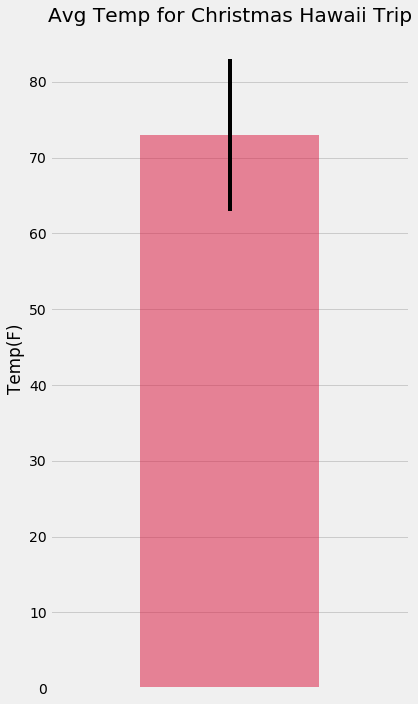

In [119]:
#Plot the min, avg, and max temperature from your previous query as a bar chart.
#Use the average temperature as the bar height.
#Use the peak-to-peak (TMAX-TMIN) value as the y error bar (YERR).
calc_df = pd.DataFrame(calculation, columns=["t_min", "t_avg", "t_max"])
error = (calc_df["t_max"]-calc_df["t_min"])
plt.figure(figsize=(6,10))
ax=calc_df["t_avg"].plot.bar(yerr=error, align='center', alpha=0.5, color='crimson')
ax.set_ylabel('Temp(F)')
ax.axes.get_xaxis().set_visible(False)
ax.set_title('Avg Temp for Christmas Hawaii Trip')

# Save the figure and show
plt.tight_layout()
plt.savefig('Final Images/Avg Christmas Temp.png')
plt.show()

In [ ]:
#DAILY RAINFALL AVERAGE

In [109]:
#Calculate the rainfall per weather station using the previous year's matching dates.
merged = pd.merge(measurement_df, station_df, how='outer',
                  left_on='station', right_on='station')

annual_prcp = merged[(merged['date']>= "2016-08-23")]

station_prcp=annual_prcp.groupby(['station'])['prcp'].sum()
station_prcp

station
USC00513117     48.51
USC00514830     38.36
USC00516128    148.70
USC00517948      9.28
USC00519281     70.03
USC00519397     16.15
USC00519523     41.44
Name: prcp, dtype: float64

In [110]:
#You are provided with a function called daily_normals that will calculate the daily normals for a specific date. 
#This date string will be in the format %m-%d. Be sure to use all historic TOBS that match that date string.

# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [111]:
#Calculate the daily normals. Normals are the averages for the min, avg, and max temperatures.
#Create a list of dates for your trip in the format %m-%d. Use the daily_normals function to calculate 
#the normals for each date string and append the results to a list.
trip_dates = ["12-19","12-20","12-21","12-22","12-23","12-24","12-25","12-26","12-26","12-27"]
normals=[]
for date in trip_dates:
    normals.append(daily_normals(date))

In [112]:
# flatten the normals list
normal_list = [item for sublist in normals for item in sublist]
normal_list

[(67.0, 72.0, 78.0),
 (65.0, 72.91304347826087, 81.0),
 (67.0, 72.13953488372093, 78.0),
 (67.0, 71.1304347826087, 77.0),
 (61.0, 70.34693877551021, 78.0),
 (62.0, 70.0625, 78.0),
 (60.0, 71.75, 79.0),
 (63.0, 71.44680851063829, 77.0),
 (63.0, 71.44680851063829, 77.0),
 (62.0, 71.91666666666667, 79.0)]

In [114]:
#Load the list of daily normals into a Pandas DataFrame and set the index equal to the date.
normals_df = pd.DataFrame(normal_list, columns=["tmin","tavg", "tmax"], index=trip_dates)
normals_df.index.name="date"

normals_df

,tmin,tavg,tmax
date,,,
12-19,67.0,72.000000,78.0
12-20,65.0,72.913043,81.0
12-21,67.0,72.139535,78.0
12-22,67.0,71.130435,77.0
12-23,61.0,70.346939,78.0
12-24,62.0,70.062500,78.0
12-25,60.0,71.750000,79.0
12-26,63.0,71.446809,77.0
12-26,63.0,71.446809,77.0


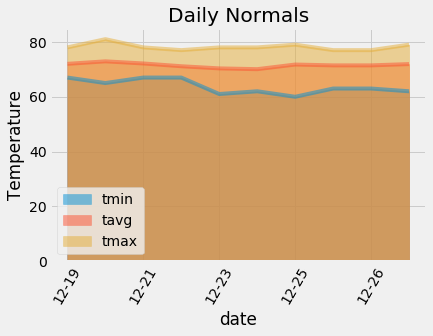

In [121]:
#Use Pandas to plot an area plot (stacked=False) for the daily normals.
normals_df.plot.area(stacked=False)
plt.xticks(rotation=60)
plt.ylabel('Temperature')
plt.title("Daily Normals")
plt.savefig('Final Images/Daily Normals.png')
plt.show()